In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import tree

In [ ]:
csv_file_name = "churn_prediction.csv"

In [ ]:
df = pd.read_csv( csv_file_name )

In [ ]:
df

customer_id  vintage  age  gender  dependents     occupation    city  \
0                1     2101   66    Male         0.0  self_employed   187.0   
1                2     2348   35    Male         0.0  self_employed     NaN   
2                4     2194   31    Male         0.0       salaried   146.0   
3                5     2329   90     NaN         NaN  self_employed  1020.0   
4                6     1579   42    Male         2.0  self_employed  1494.0   
...            ...      ...  ...     ...         ...            ...     ...   
28377        30297     2325   10  Female         0.0        student  1020.0   
28378        30298     1537   34  Female         0.0  self_employed  1046.0   
28379        30299     2376   47    Male         0.0       salaried  1096.0   
28380        30300     1745   50    Male         3.0  self_employed  1219.0   
28381        30301     1175   18    Male         0.0        student  1232.0   

       customer_nw_category  branch_code  current_balance  ...  \
0                         2          755          1458.71  ...   
1                         2         3214          5390.37  ...   
2                         2           41          3913.16  ...   
3                         2          582          2291.91  ...   
4                         3          388           927.72  ...   
...                     ...          ...              ...  ...   
28377                     2         1207          1076.43  ...   
28378                     2          223          3844.10  ...   
28379                     2          588         65511.97  ...   
28380                     3          274          1625.55  ...   
28381                     2          474          2107.05  ...   

       average_monthly_balance_prevQ  average_monthly_balance_prevQ2  \
0                            1458.71                         1449.07   
1                            7799.26                        12419.41   
2                            4910.17                         2815.94   
3                            2084.54                         1006.54   
4                            1643.31                         1871.12   
...                              ...                             ...   
28377                        2282.19                         2787.70   
28378                        3668.83                         3865.55   
28379                       53444.81                        21925.81   
28380                        1683.20                         1857.42   
28381                        3213.44                         4447.45   

       current_month_credit  previous_month_credit  current_month_debit  \
0                      0.20                   0.20                 0.20   
1                      0.56                   0.56              5486.27   
2                      0.61                   0.61              6046.73   
3                      0.47                   0.47                 0.47   
4                      0.33                 714.61               588.62   
...                     ...                    ...                  ...   
28377                  0.30                   0.30                 0.30   
28378                  1.71                   2.29               901.00   
28379               4666.84                3883.06               168.23   
28380                  0.20                   0.20                 0.20   
28381                  0.11                   7.44               714.40   

       previous_month_debit  current_month_balance  previous_month_balance  \
0                      0.20                1458.71                 1458.71   
1                    100.56                6496.78                 8787.61   
2                    259.23                5006.28                 5070.14   
3                   2143.33                2291.91                 1669.79   
4                   1538.06                1157.15                 1677.16   
...                     ...    

In [ ]:
df.shape

(28382, 21)

In [ ]:
df.head(5)

customer_id  vintage  age gender  dependents     occupation    city  \
0            1     2101   66   Male         0.0  self_employed   187.0   
1            2     2348   35   Male         0.0  self_employed     NaN   
2            4     2194   31   Male         0.0       salaried   146.0   
3            5     2329   90    NaN         NaN  self_employed  1020.0   
4            6     1579   42   Male         2.0  self_employed  1494.0   

   customer_nw_category  branch_code  current_balance  ...  \
0                     2          755          1458.71  ...   
1                     2         3214          5390.37  ...   
2                     2           41          3913.16  ...   
3                     2          582          2291.91  ...   
4                     3          388           927.72  ...   

   average_monthly_balance_prevQ  average_monthly_balance_prevQ2  \
0                        1458.71                         1449.07   
1                        7799.26                        12419.41   
2                        4910.17                         2815.94   
3                        2084.54                         1006.54   
4                        1643.31                         1871.12   

   current_month_credit  previous_month_credit  current_month_debit  \
0                  0.20                   0.20                 0.20   
1                  0.56                   0.56              5486.27   
2                  0.61                   0.61              6046.73   
3                  0.47                   0.47                 0.47   
4                  0.33                 714.61               588.62   

   previous_month_debit  current_month_balance  previous_month_balance  churn  \
0                  0.20                1458.71                 1458.71      0   
1                100.56                6496.78                 8787.61      0   
2                259.23                5006.28                 5070.14      0   
3               2143.33                2291.91                 1669.79      1   
4               1538.06                1157.15                 1677.16      1   

   last_transaction  
0        2019-05-21  
1        2019-11-01  
2               NaT  
3        2019-08-06  
4        2019-11-03  

[5 rows x 21 columns]

In [ ]:
df.tail(5)

customer_id  vintage  age  gender  dependents     occupation    city  \
28377        30297     2325   10  Female         0.0        student  1020.0   
28378        30298     1537   34  Female         0.0  self_employed  1046.0   
28379        30299     2376   47    Male         0.0       salaried  1096.0   
28380        30300     1745   50    Male         3.0  self_employed  1219.0   
28381        30301     1175   18    Male         0.0        student  1232.0   

       customer_nw_category  branch_code  current_balance  ...  \
28377                     2         1207          1076.43  ...   
28378                     2          223          3844.10  ...   
28379                     2          588         65511.97  ...   
28380                     3          274          1625.55  ...   
28381                     2          474          2107.05  ...   

       average_monthly_balance_prevQ  average_monthly_balance_prevQ2  \
28377                        2282.19                         2787.70   
28378                        3668.83                         3865.55   
28379                       53444.81                        21925.81   
28380                        1683.20                         1857.42   
28381                        3213.44                         4447.45   

       current_month_credit  previous_month_credit  current_month_debit  \
28377                  0.30                   0.30                 0.30   
28378                  1.71                   2.29               901.00   
28379               4666.84                3883.06               168.23   
28380                  0.20                   0.20                 0.20   
28381                  0.11                   7.44               714.40   

       previous_month_debit  current_month_balance  previous_month_balance  \
28377                  0.30                1076.43                 1076.43   
28378               1014.07                3738.54                 3690.32   
28379                 71.80               61078.50                57564.24   
28380                  0.20                1625.55                 1625.55   
28381               1094.09                2402.62                 3260.58   

       churn  last_transaction  
28377      0        2019-10-22  
28378      0        2019-12-17  
28379      1        2019-12-31  
28380      0               NaT  
28381      1        2019-11-02  

[5 rows x 21 columns]

In [ ]:
df.index #Range index of the given data

RangeIndex(start=0, stop=28382, step=1)

In [ ]:
df.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'last_transaction'],
      dtype='object')

In [ ]:
df.describe()

customer_id       vintage           age    dependents          city  \
count  28382.000000  28382.000000  28382.000000  25919.000000  27579.000000   
mean   15143.508667   2091.144105     48.208336      0.347236    796.109576   
std     8746.454456    272.676775     17.807163      0.997661    432.872102   
min        1.000000     73.000000      1.000000      0.000000      0.000000   
25%     7557.250000   1958.000000     36.000000      0.000000    409.000000   
50%    15150.500000   2154.000000     46.000000      0.000000    834.000000   
75%    22706.750000   2292.000000     60.000000      0.000000   1096.000000   
max    30301.000000   2476.000000     90.000000     52.000000   1649.000000   

       customer_nw_category   branch_code  current_balance  \
count          28382.000000  28382.000000     2.838200e+04   
mean               2.225530    925.975019     7.380552e+03   
std                0.660443    937.799129     4.259871e+04   
min                1.000000      1.000000    -5.503960e+03   
25%                2.000000    176.000000     1.784470e+03   
50%                2.000000    572.000000     3.281255e+03   
75%                3.000000   1440.000000     6.635820e+03   
max                3.000000   4782.000000     5.905904e+06   

       previous_month_end_balance  average_monthly_balance_prevQ  \
count                2.838200e+04                   2.838200e+04   
mean                 7.495771e+03                   7.496780e+03   
std                  4.252935e+04                   4.172622e+04   
min                 -3.149570e+03                   1.428690e+03   
25%                  1.906000e+03                   2.180945e+03   
50%                  3.379915e+03                   3.542865e+03   
75%                  6.656535e+03                   6.666887e+03   
max                  5.740439e+06                   5.700290e+06   

       average_monthly_balance_prevQ2  current_month_credit  \
count                    2.838200e+04          2.838200e+04   
mean                     7.124209e+03          3.433252e+03   
std                      4.457581e+04          7.707145e+04   
min                     -1.650610e+04          1.000000e-02   
25%                      1.832507e+03          3.100000e-01   
50%                      3.359600e+03          6.100000e-01   
75%                      6.517960e+03          7.072725e+02   
max                      5.010170e+06          1.226985e+07   

       previous_month_credit  current_month_debit  previous_month_debit  \
count           2.838200e+04         2.838200e+04          2.838200e+04   
mean            3.261694e+03         3.658745e+03          3.339761e+03   
std             2.968889e+04         5.198542e+04          2.430111e+04   
min             1.000000e-02         1.000000e-02          1.000000e-02   
25%             3.300000e-01         4.100000e-01          4.100000e-01   
50%             6.300000e-01         9.193000e+01          1.099600e+02   
75%             7.492350e+02         1.360435e+03          1.357553e+03   
max             2.361808e+06         7.637857e+06          1.414168e+06   

       current_month_balance  previous_month_balance         churn  
count           2.838200e+04            2.838200e+04  28382.000000  
mean            7.451133e+03            7.495177e+03      0.185329  
std             4.203394e+04            4.243198e+04      0.388571  
min            -3.374180e+03           -5.171920e+03      0.000000  
25%             1.996765e+03            2.074407e+03      0.000000  
50%             3.447995e+03            3.465235e+03      0.000000  
75%             6.667958e+03            6.654693e+03      0.000000  
max             5.778185e+06            5.720144e+06      1.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   current_balance                 28382 non-null  float64
 10  previous_month_end_balance      28382 non-null  float64
 11  average_monthly_balance_prevQ   28382 non-null  float64
 12  average_monthly_balance_prevQ2  

In [ ]:
df.isnull().sum() #Check for null Values if any each column

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
last_transaction                     0
dtype: int64

In [ ]:
df.duplicated().sum()#check if there are duplicate records in th data

0

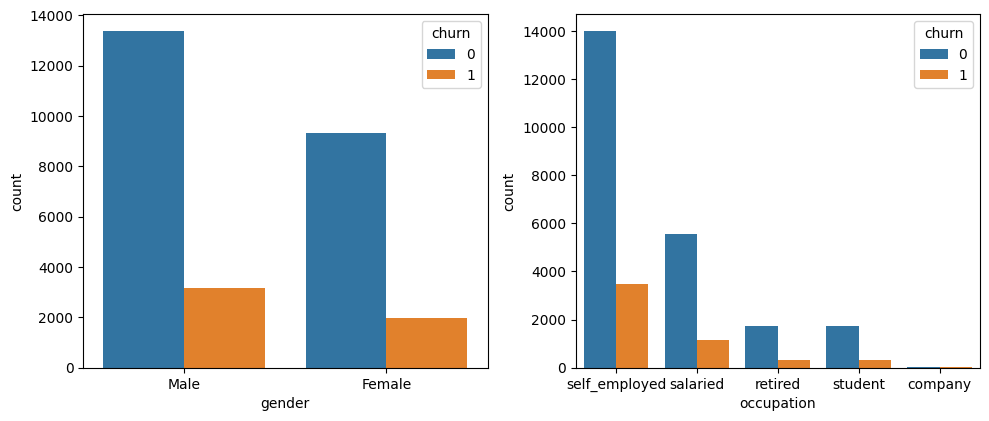

In [ ]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.countplot(x='gender', hue= 'churn', data = df)
plt.subplot(2,2,2)
sns.countplot(x = 'occupation', hue = 'churn', data = df)
plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'customer_id'}>,
        <Axes: title={'center': 'vintage'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'dependents'}>],
       [<Axes: title={'center': 'city'}>,
        <Axes: title={'center': 'customer_nw_category'}>,
        <Axes: title={'center': 'branch_code'}>,
        <Axes: title={'center': 'current_balance'}>],
       [<Axes: title={'center': 'previous_month_end_balance'}>,
        <Axes: title={'center': 'average_monthly_balance_prevQ'}>,
        <Axes: title={'center': 'average_monthly_balance_prevQ2'}>,
        <Axes: title={'center': 'current_month_credit'}>],
       [<Axes: title={'center': 'previous_month_credit'}>,
        <Axes: title={'center': 'current_month_debit'}>,
        <Axes: title={'center': 'previous_month_debit'}>,
        <Axes: title={'center': 'current_month_balance'}>],
       [<Axes: title={'center': 'previous_month_balance'}>,
        <Axes: title={'center': 'churn'}>, <Axes: >, <Axes: >

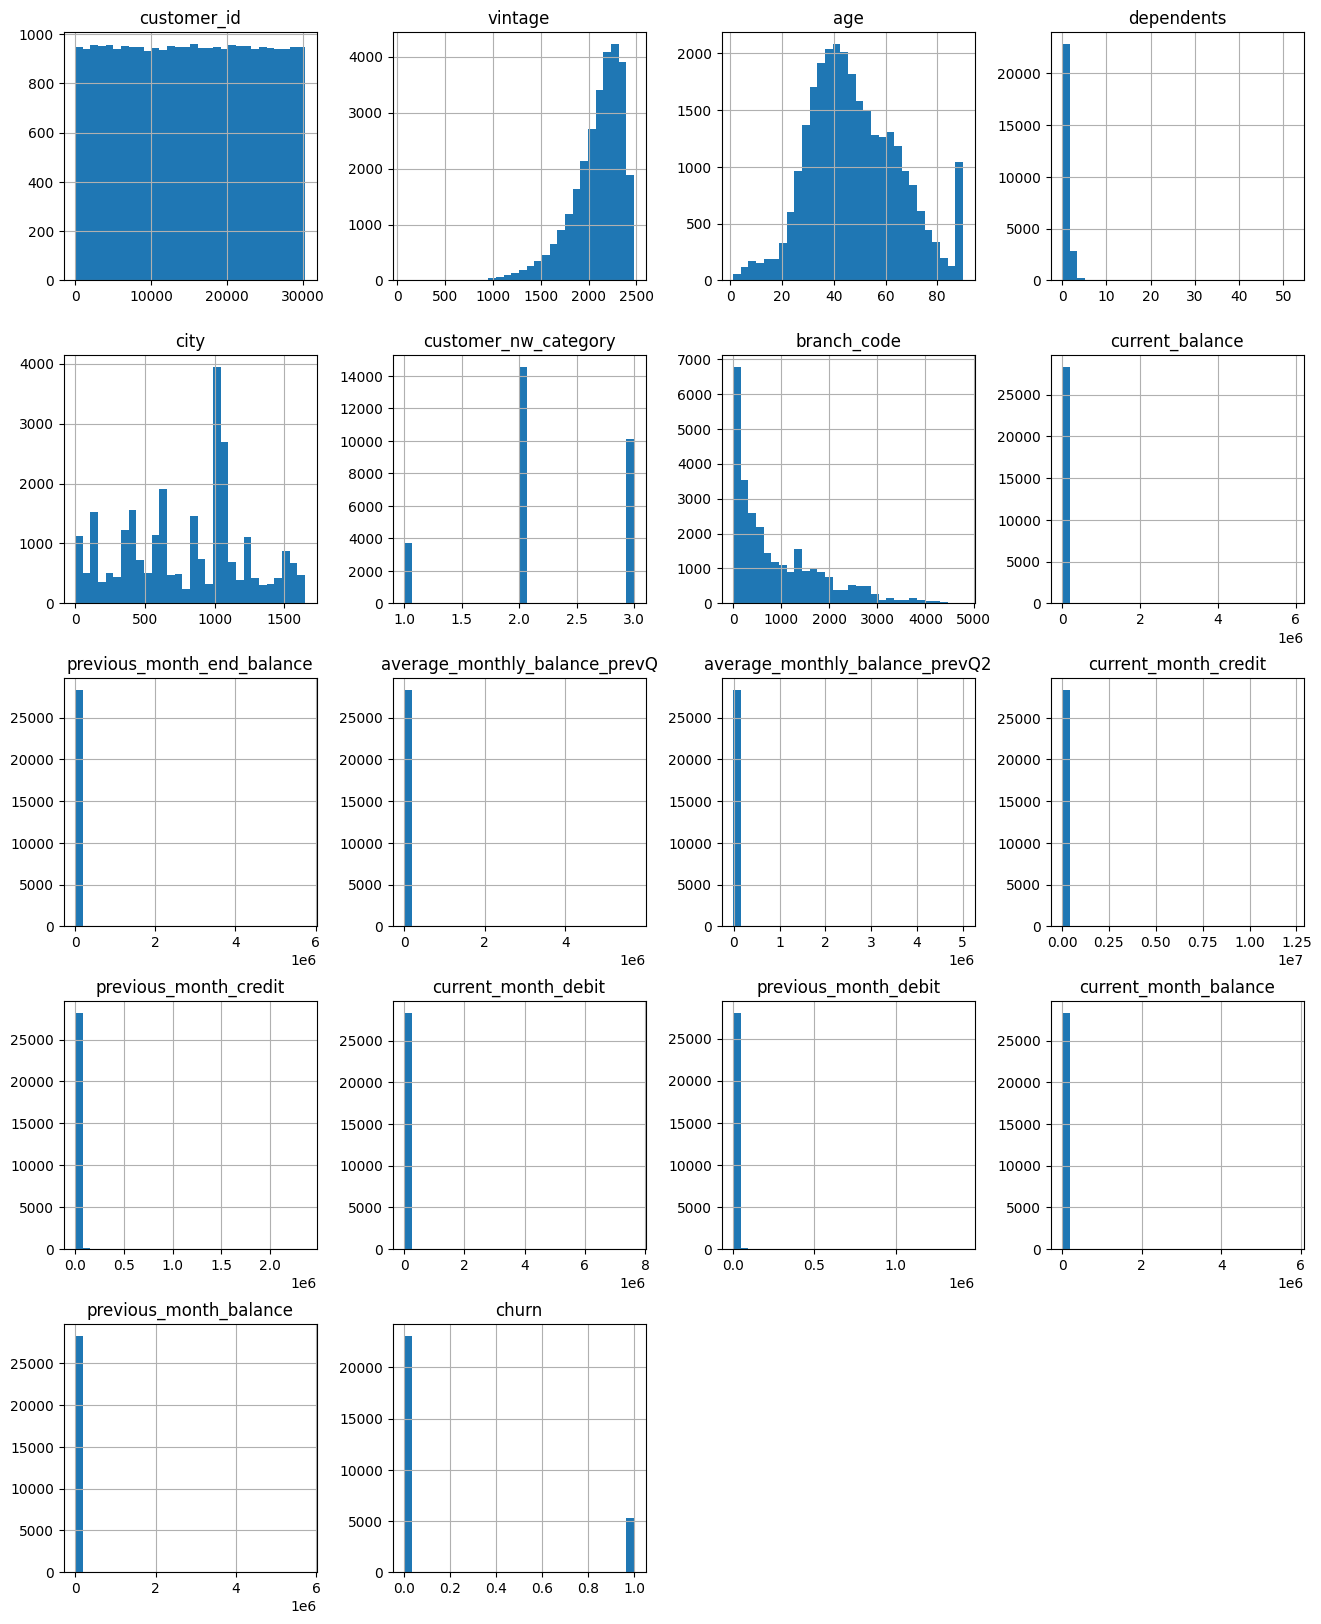

In [ ]:
numeric_columns = df.select_dtypes(include = 'number')
numeric_columns.hist(figsize = (16,20),bins = 30)

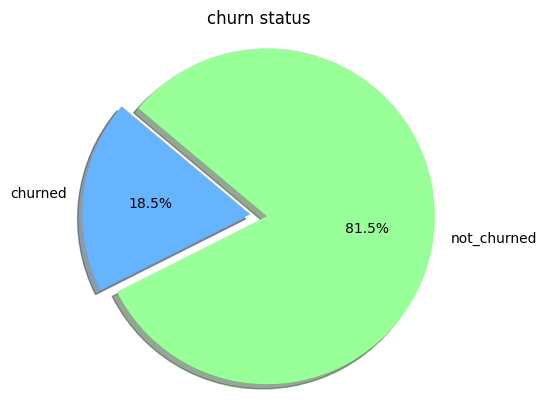

In [ ]:
total_count = len(df.churn)
churned= (df['churn']==1).sum()
not_churned = total_count-churned


churned_percent = (churned / total_count)*100
not_churned_percent = (not_churned / total_count)*100

labels = ['churned','not_churned']
sizes = [churned_percent,not_churned_percent]
colors = ['#66b3ff','#99ff99']
explode = (0.1,0)
plt.pie(sizes,explode = explode,labels = labels,colors=colors,autopct = '%1.1f%%',shadow = True, startangle=  140)
plt.axis('equal')
plt.title('churn status')
plt.show()

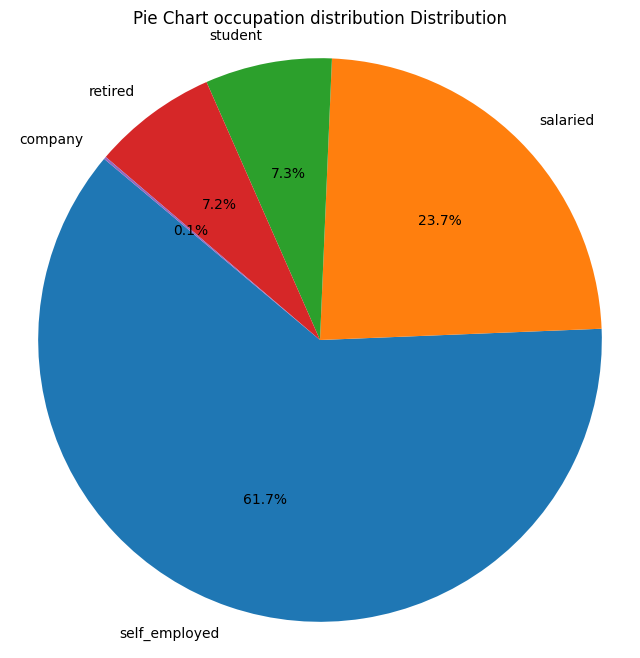

In [ ]:
categorical_features = df.select_dtypes(include=['object', 'category'])

category_counts = categorical_features['occupation'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart occupation distribution Distribution')
plt.axis('equal')

plt.show()

In [ ]:
personal_info_col = ['age', 'gender', 'occupation', 'city', 'churn']

<ipython-input-21-8b414e8abecd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  bank_info_cor = df.corr()


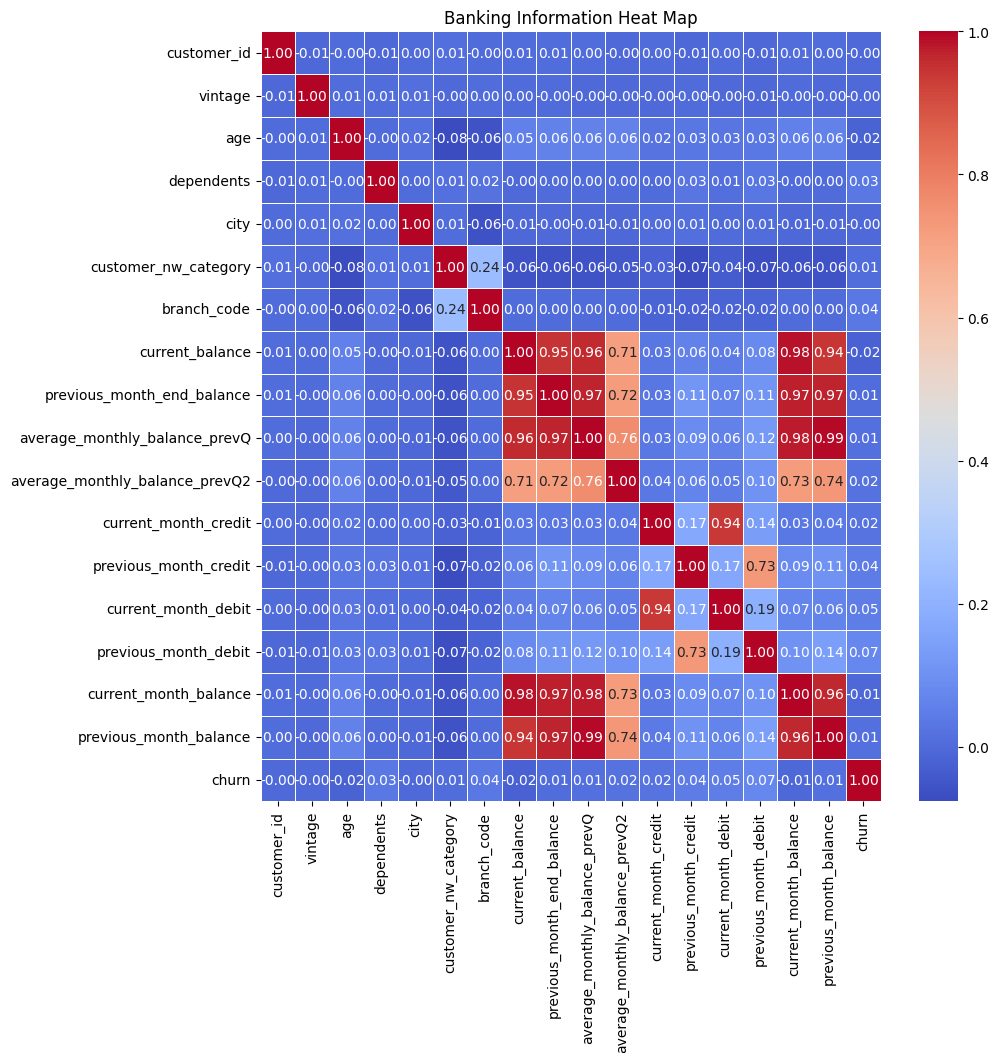

In [ ]:
bank_info_cor = df.corr()

# Heat Map
plt.figure(figsize=(10, 10))
sns.heatmap(bank_info_cor, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)

# Labels
plt.title("Banking Information Heat Map")

plt.savefig('banking_info_heatmap.png')
plt.show()

In [ ]:
churn_counts = df['churn'].value_counts()

print(churn_counts)

0    23122
1     5260
Name: churn, dtype: int64


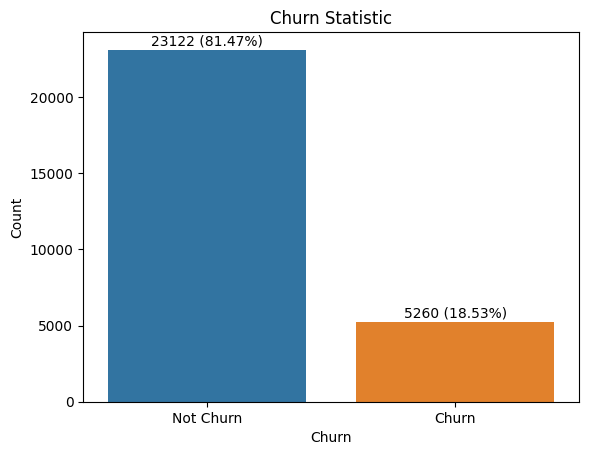

In [ ]:
churn_counts = df['churn'].value_counts()
total_samples = len(df['churn'])

sns.barplot(x=churn_counts.index, y=churn_counts.values)
plt.title('Churn Statistic')
plt.xlabel('Churn')
plt.ylabel('Count')

for index, value in enumerate(churn_counts):
    plt.text(index, value + 100, f'{value} ({value / total_samples * 100:.2f}%)', ha='center', va='bottom')

plt.xticks(ticks=[0, 1], labels=['Not Churn', 'Churn'])
plt.show()

In [ ]:
# Gender statistic

print(df['gender'].value_counts(dropna=False))


missing_gender_percentage = df['gender'].isnull().sum() / len(df) * 100
print(f"Percentage of missing values in 'gender': {missing_gender_percentage:.2f}%")

Male      16548
Female    11309
NaN         525
Name: gender, dtype: int64
Percentage of missing values in 'gender': 1.85%


In [ ]:
df['gender'].fillna('Unknown', inplace=True)
print(df['gender'].value_counts(dropna=False))

Male       16548
Female     11309
Unknown      525
Name: gender, dtype: int64


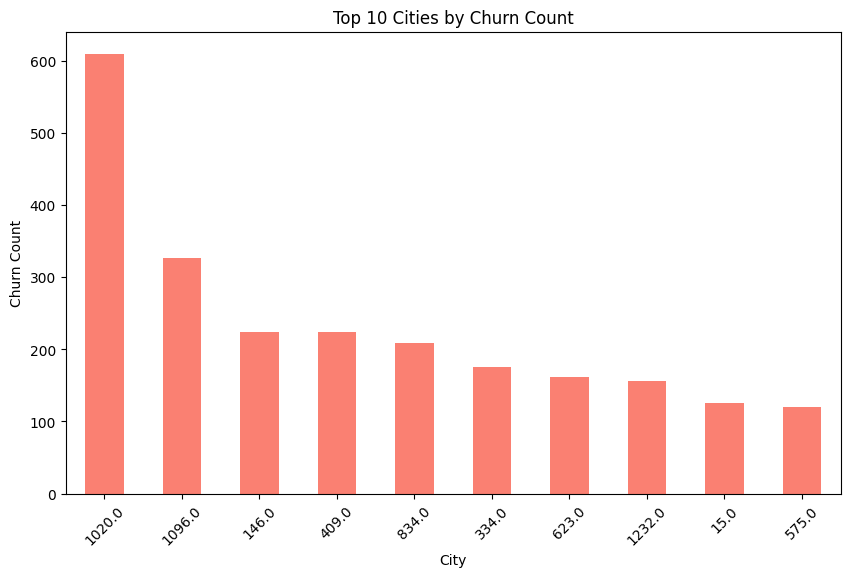

In [ ]:
# City -  visualization churn

top_ten_cities_churn = df[df['churn'] == 1]['city'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
top_ten_cities_churn.plot(kind='bar', color='salmon')
plt.title('Top 10 Cities by Churn Count')
plt.xlabel('City')
plt.ylabel('Churn Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
target_column_name = "churn"

In [ ]:
categorical_target_column = True

In [ ]:
#Find out number of rows and columns
print(f'Total Number of Rows : {df.shape[0]}')
print(f'Total Number of Columns : {df.shape[1]}')

Total Number of Rows : 28382
Total Number of Columns : 21


In [ ]:
if categorical_target_column :
  print( df[target_column_name].value_counts() )

0    23122
1     5260
Name: churn, dtype: int64


Text(0.5, 1.0, 'Total Number of Null values for Each Column')

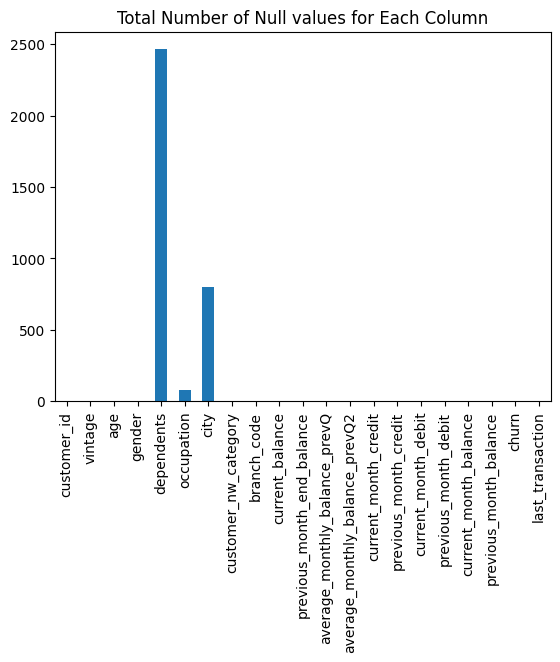

In [ ]:
df.isnull().sum().plot(kind='bar')
plt.title("Total Number of Null values for Each Column")

In [ ]:
#Find out the percentages of null value cout for each column
( df.isnull().sum()/len(df) ) *100

customer_id                       0.000000
vintage                           0.000000
age                               0.000000
gender                            0.000000
dependents                        8.678035
occupation                        0.281869
city                              2.829258
customer_nw_category              0.000000
branch_code                       0.000000
current_balance                   0.000000
previous_month_end_balance        0.000000
average_monthly_balance_prevQ     0.000000
average_monthly_balance_prevQ2    0.000000
current_month_credit              0.000000
previous_month_credit             0.000000
current_month_debit               0.000000
previous_month_debit              0.000000
current_month_balance             0.000000
previous_month_balance            0.000000
churn                             0.000000
last_transaction                  0.000000
dtype: float64

In [ ]:
# If total number of missing value is less than 5% then drop it otherwise fill using backward fill/forward fill.

print(f'Maximum Null values in column (Before Handling)  : { df.isnull().sum().max() }')

if (df.isnull().sum().max() > len(df) ) * 0.05:
  print("\n------Dropped Null Values-------\n")
  df.dropna( inplace = True)
else:
  print("\n------Replaced Null Values-------\n")
  df.fillna( method = 'bfill' , inplace = True) # You can use 'ffill' to forward fill


print(f'Maximum Null values in column (After Handling)  : { df.isnull().sum().max() }')

Maximum Null values in column (Before Handling)  : 2463

------Replaced Null Values-------

Maximum Null values in column (After Handling)  : 0


In [ ]:
#Duplicate entry count
df.duplicated().value_counts()

print( ( df.duplicated().value_counts()/len(df) ) * 100)

False    100.0
dtype: float64


In [ ]:
df.info()

print("\n\n-----------------Unique Values per column--------------------------------\n\n")

df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          28382 non-null  object 
 4   dependents                      28382 non-null  float64
 5   occupation                      28382 non-null  object 
 6   city                            28382 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   current_balance                 28382 non-null  float64
 10  previous_month_end_balance      28382 non-null  float64
 11  average_monthly_balance_prevQ   28382 non-null  float64
 12  average_monthly_balance_prevQ2  

customer_id                       28382
vintage                            1459
age                                  90
gender                                3
dependents                           15
occupation                            5
city                               1604
customer_nw_category                  3
branch_code                        3185
current_balance                   27903
previous_month_end_balance        27922
average_monthly_balance_prevQ     27801
average_monthly_balance_prevQ2    27940
current_month_credit              10411
previous_month_credit             10711
current_month_debit               13704
previous_month_debit              14010
current_month_balance             27944
previous_month_balance            27913
churn                                 2
last_transaction                    361
dtype: int64

In [ ]:
categorical_columns = ["customer_id" , "gender" , "occupation" ,"city"]
numeric_columns = [ "age" , "vintage","branch_code"]

<Axes: >

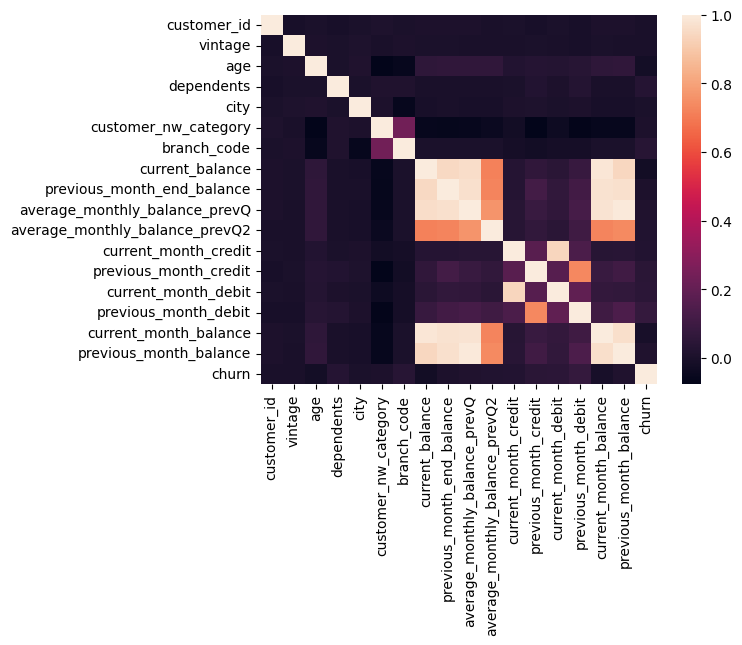

In [ ]:
sns.heatmap(df.corr( numeric_only =  True))

In [ ]:
X = df.drop(target_column_name , axis=1 )
y =  df[target_column_name]

enc = OrdinalEncoder()
X = enc.fit_transform( X )


le = LabelEncoder()
target_class = y.unique()
y = le.fit_transform( y )


In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      6967
           1       0.74      0.37      0.49      1548

    accuracy                           0.86      8515
   macro avg       0.81      0.67      0.71      8515
weighted avg       0.85      0.86      0.84      8515



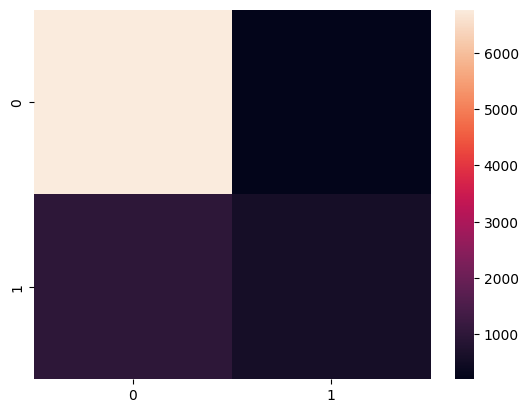

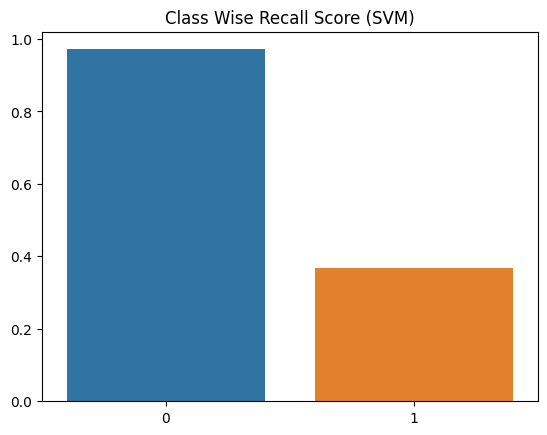

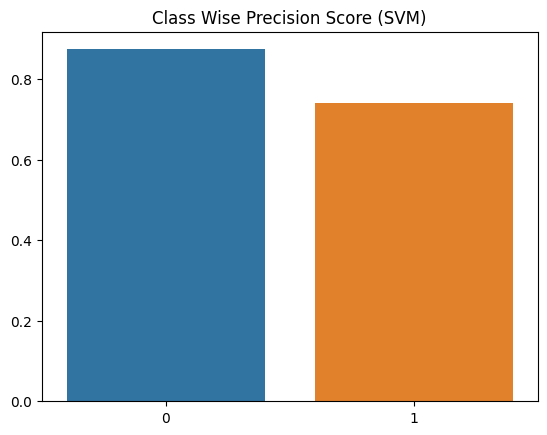

In [ ]:
if categorical_target_column:
  clf = SVC()
  clf.fit( X_train , y_train )
  y_pred = clf.predict( X_test )

  print( classification_report( y_test , y_pred ) )

  matrix = confusion_matrix( y_test , y_pred )
  sns.heatmap( matrix )
  plt.show()

  sns.barplot( x = target_class ,y = recall_score( y_test , y_pred , average =  None) )
  plt.title( "Class Wise Recall Score (SVM)")
  plt.show()

  sns.barplot( x = target_class ,y = precision_score( y_test , y_pred , average =  None) )
  plt.title( "Class Wise Precision Score (SVM)")
  plt.show()

else:
  #apply linear regression . As shown in lab
  print("You Need to use Linear Regression as your target column in Numeric")

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      6967
           1       0.44      0.45      0.44      1548

    accuracy                           0.80      8515
   macro avg       0.66      0.66      0.66      8515
weighted avg       0.80      0.80      0.80      8515



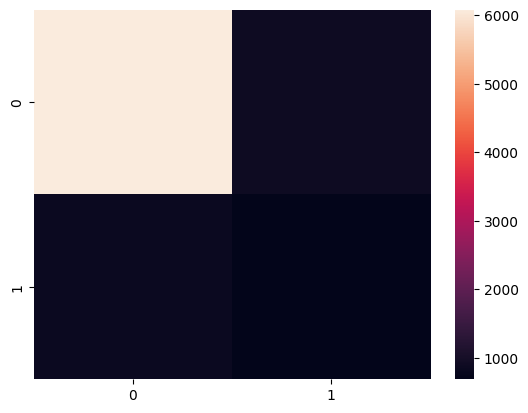

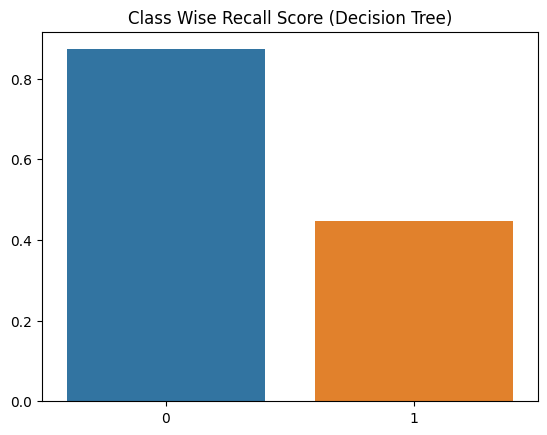

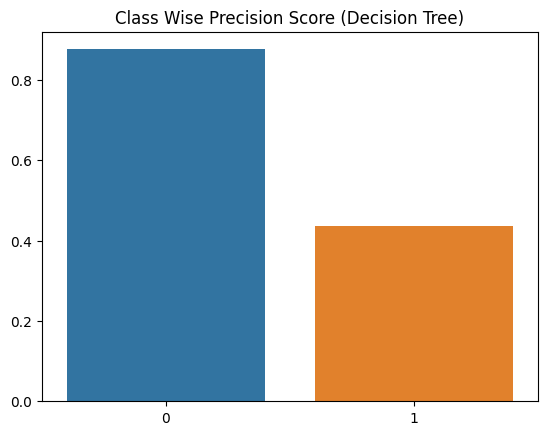

In [ ]:
if categorical_target_column:
  clf = tree.DecisionTreeClassifier()
  clf.fit( X_train , y_train )
  y_pred = clf.predict( X_test )

  print( classification_report( y_test , y_pred ) )

  matrix = confusion_matrix( y_test , y_pred )
  sns.heatmap( matrix )
  plt.show()

  sns.barplot( x = target_class ,y = recall_score( y_test , y_pred , average =  None) )
  plt.title( "Class Wise Recall Score (Decision Tree)")
  plt.show()

  sns.barplot( x = target_class ,y = precision_score( y_test , y_pred , average =  None) )
  plt.title( "Class Wise Precision Score (Decision Tree)")
  plt.show()

else:
  #apply linear regression . As shown in lab
  print("You Need to use Linear Regression as your target column in Numeric")

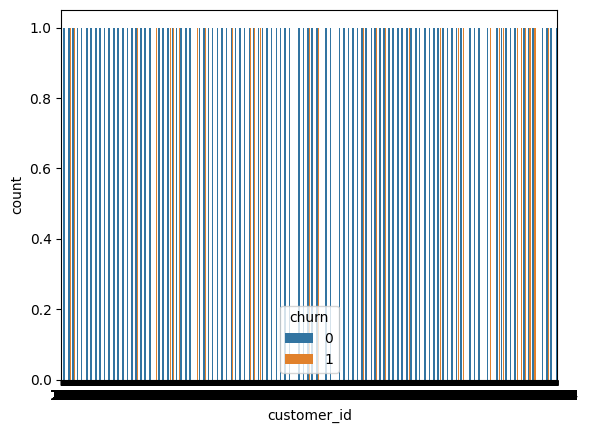

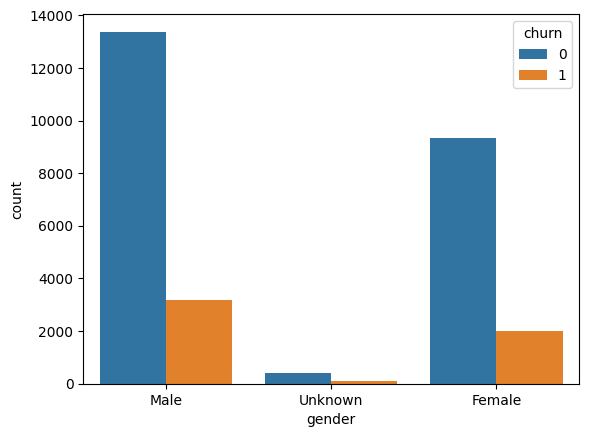

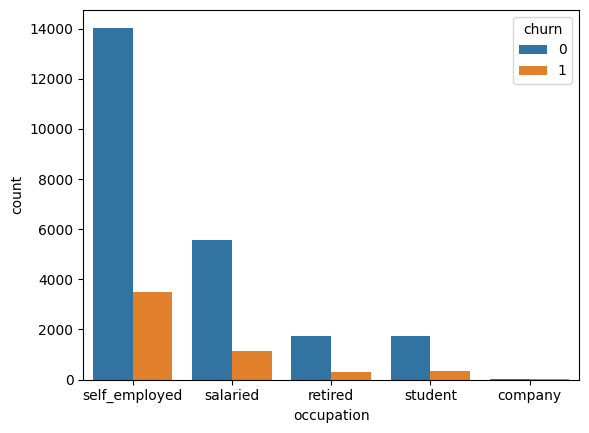

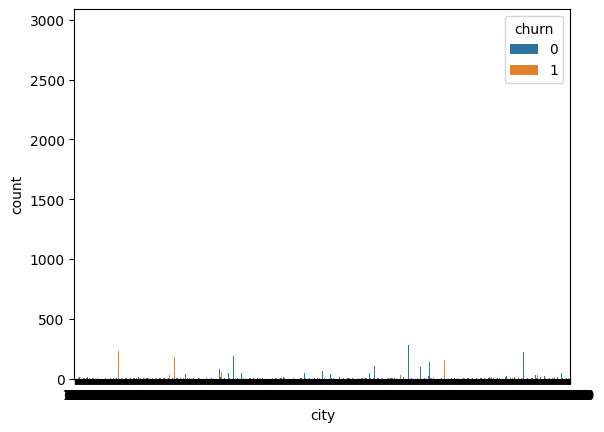

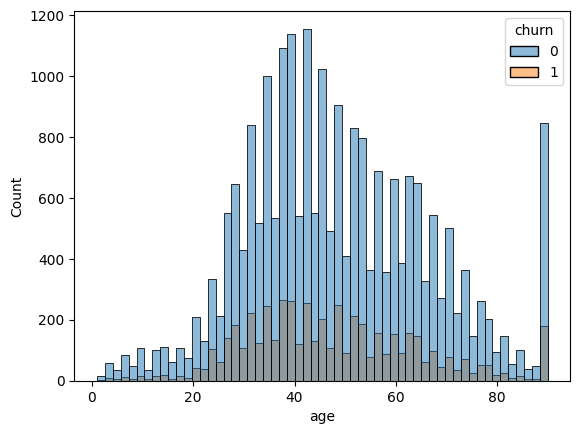

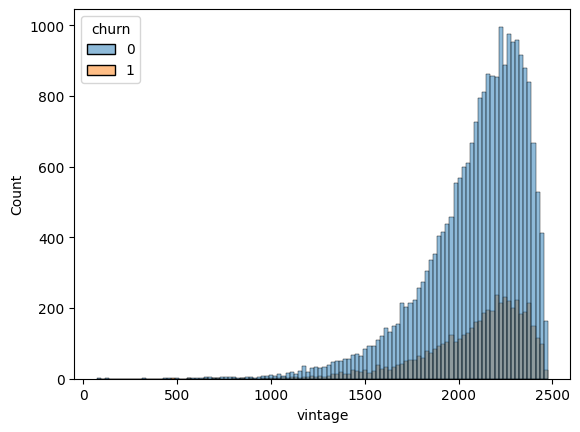

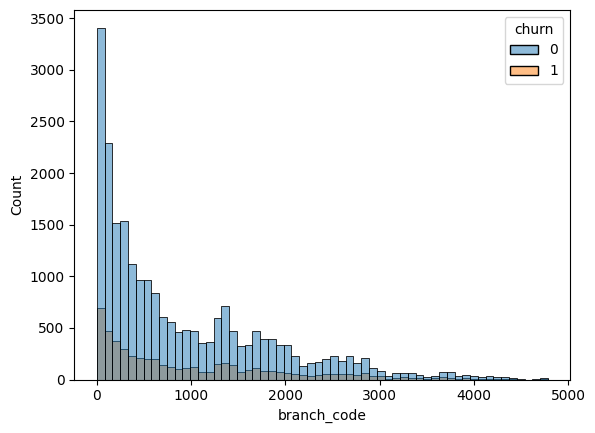

In [ ]:
if categorical_target_column:
  for column in categorical_columns:
    if column != target_column_name:
      #sns.barplot(x=column, y='Counts', hue= target_column_name, data= df.groupby([column, target_column_name]).size().reset_index(name="Counts"))
      sns.countplot( x = column , hue = target_column_name , data = df )
      plt.show()

  for column in numeric_columns:
    if column != target_column_name:
      sns.histplot( x = column , hue = target_column_name , data = df)
      plt.show()

else:
  for column in categorical_columns:
      if column != target_column_name:
        sns.histplot( x = target_column_name , hue = column , data = df)
        plt.show()

  for column in numeric_columns:
    if column != target_column_name:
      sns.scatterplot( x = target_column_name , y = column , data = df)
      plt.show()

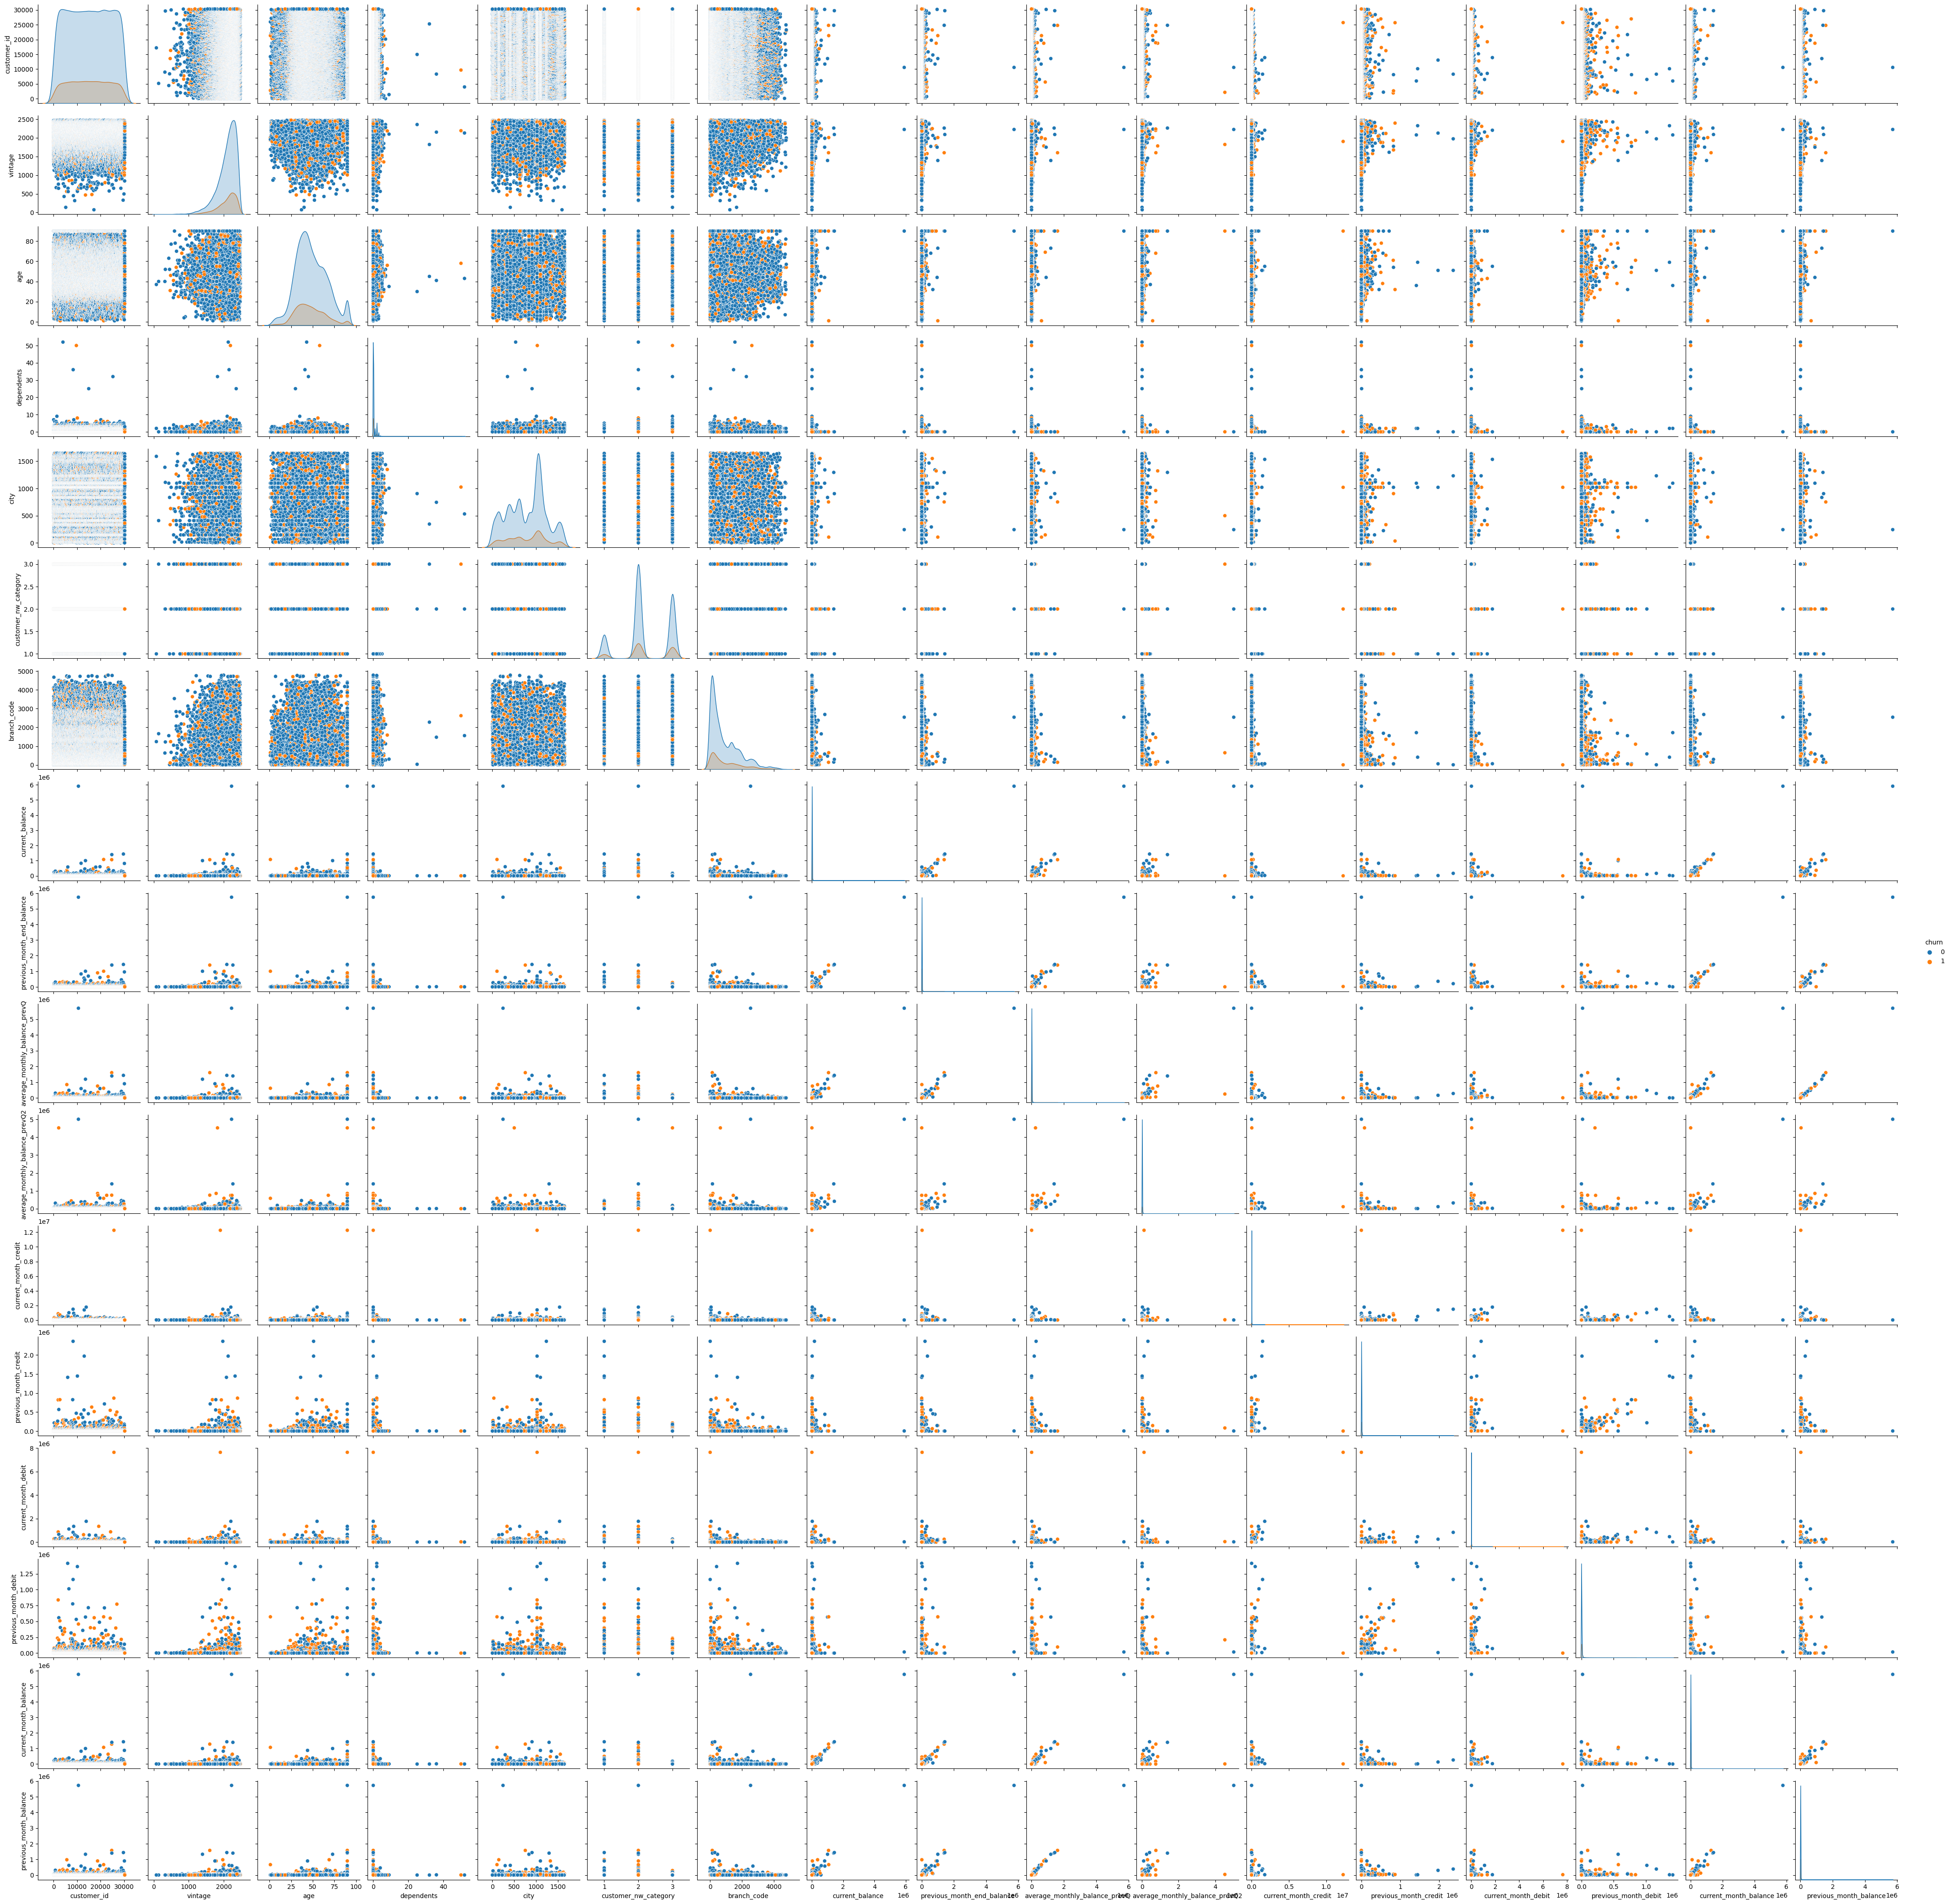

In [ ]:
if categorical_target_column:
  sns.pairplot( data=df , hue = target_column_name)